In [1]:
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_validate, learning_curve, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    path = '/Library/Fonts/Arial Unicode.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~~~~~')

print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [2]:
train = pd.read_csv('dataset/train.csv')
train.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수']
error_code = ['C2085', 'C1397', 'C2431','C1649','C1036','C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988'] 
new_train = train[~train['단지코드'].isin(error_code)]
new_train['임대보증금'] = new_train['임대보증금'].replace('-', np.nan).astype(float)
new_train['임대료'] = new_train['임대료'].replace('-', np.nan).astype(float)
new_train['전용면적'] = new_train['전용면적']//5*5
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 8 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2869 non-null   object 
 1   총세대수      2869 non-null   int64  
 2   임대건물구분    2869 non-null   object 
 3   지역        2869 non-null   object 
 4   공급유형      2869 non-null   object 
 5   전용면적      2869 non-null   float64
 6   전용면적별세대수  2869 non-null   int64  
 7   공가수       2869 non-null   float64
 8   신분        2869 non-null   object 
 9   임대보증금     2288 non-null   float64
 10  임대료       2285 non-null   float64
 11  지하철       2662 non-null   float64
 12  버스        2869 non-null   float64
 13  단지내주차면수   2869 non-null   float64
 14  등록차량수     2869 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 358.6+ KB


In [3]:
new_train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       581
임대료         584
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [4]:
def plot_box(x, y, hue=None):
    plt.figure(figsize=(20, 20))
    sns.boxplot(x, y, hue, palette="cubehelix")
    plt.show();

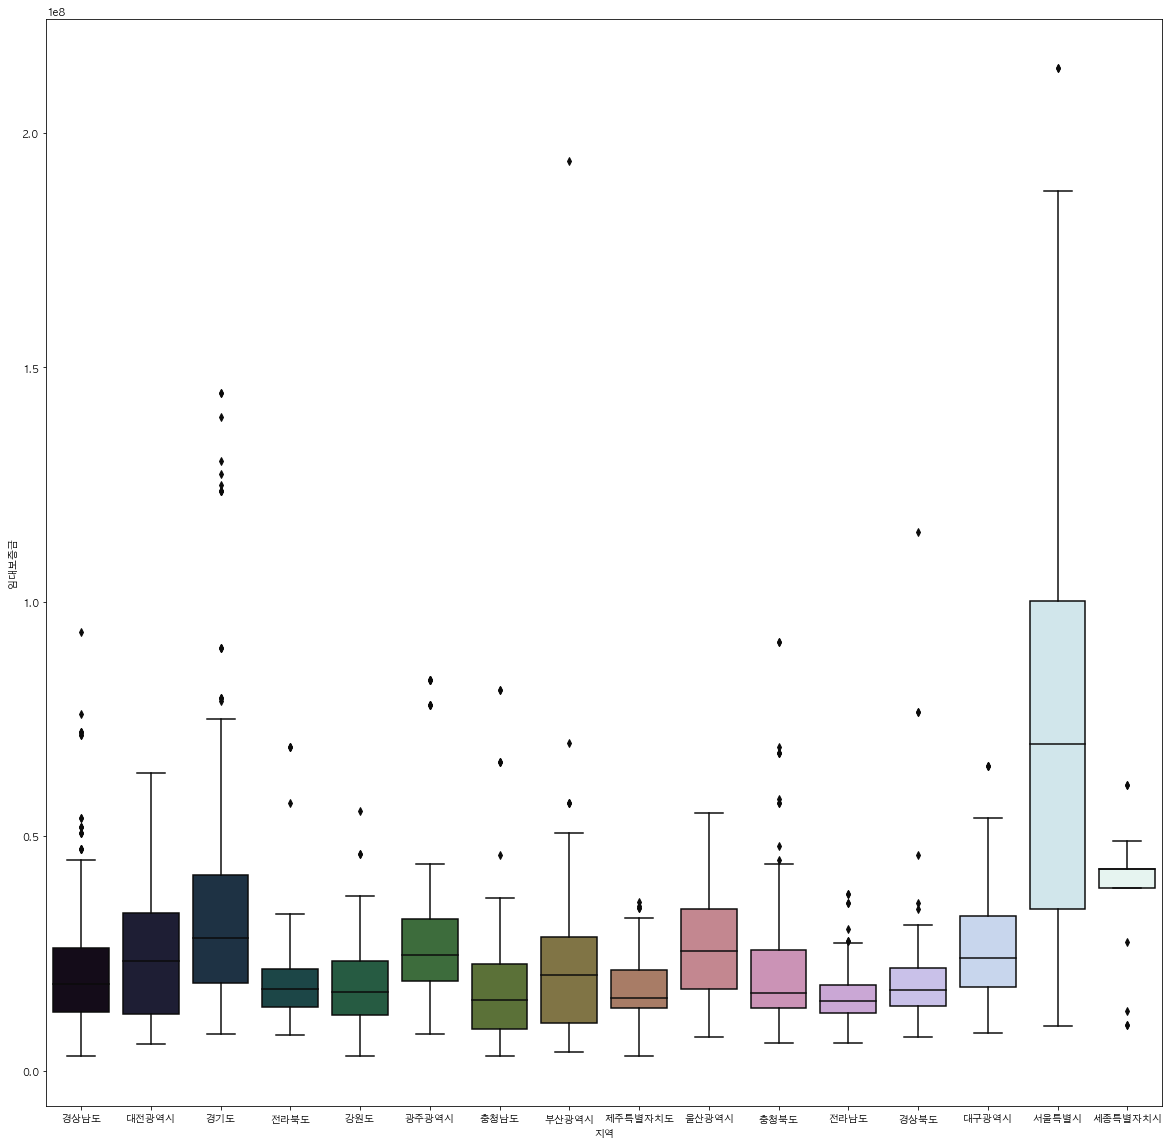

In [5]:
plot_box(new_train['지역'], new_train['임대보증금'])

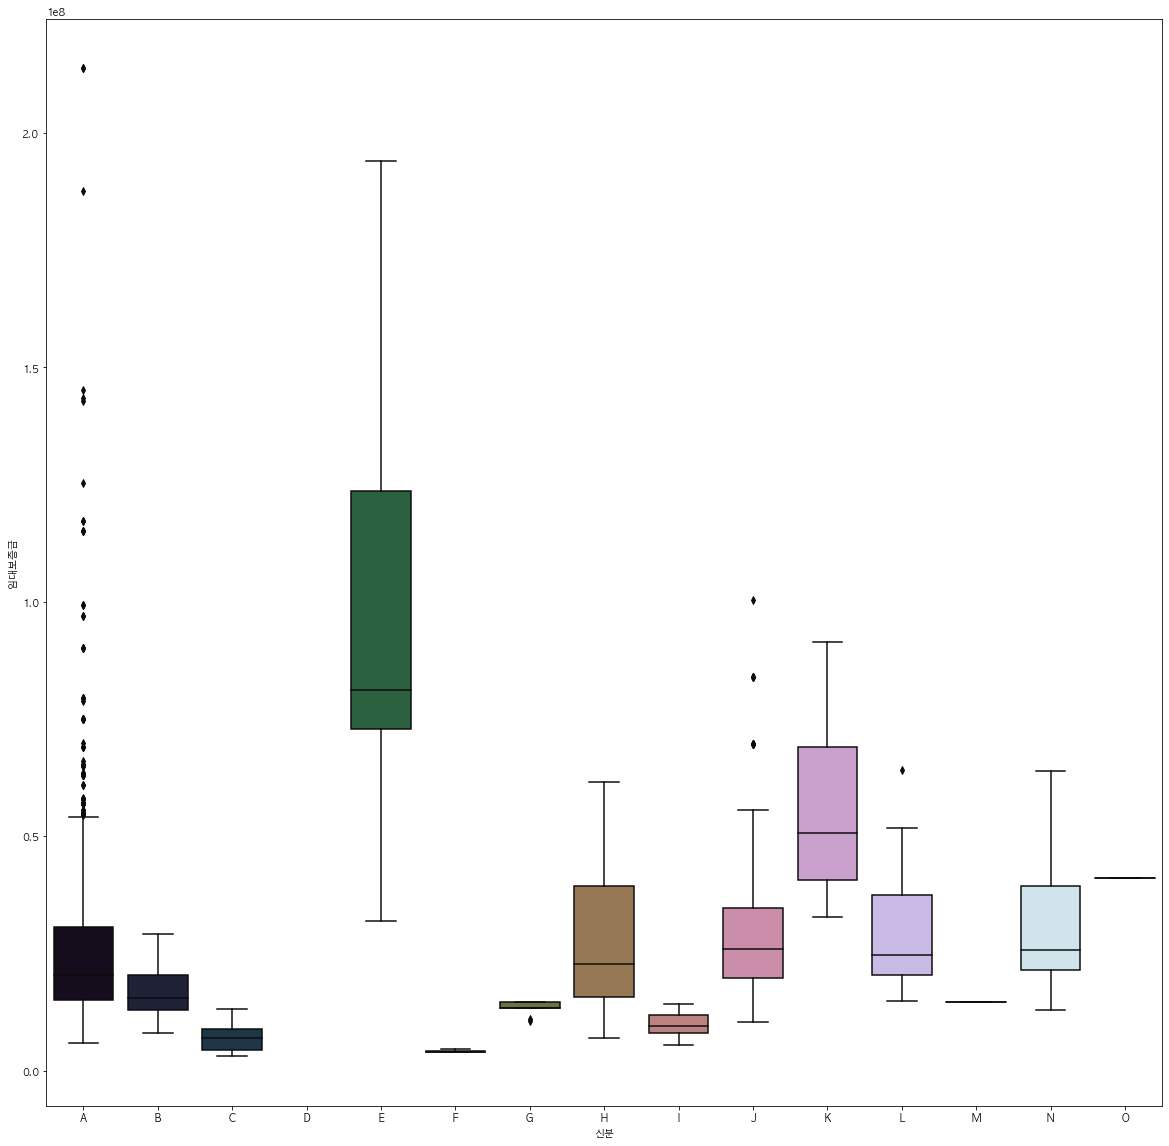

In [6]:
plot_box(new_train['신분'], new_train['임대보증금'])

In [7]:
new_train[new_train['신분'] == 'E']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
178,C1616,1507,아파트,대전광역시,영구임대,40.0,450,1.0,E,54040000.0,28140.0,NaN,2.0,407.0,98.0
823,C2401,213,아파트,강원도,국민임대,45.0,104,21.0,E,55413000.0,28850.0,0.0,3.0,164.0,19.0
959,C2097,998,아파트,경상북도,국민임대,45.0,115,29.0,E,76506000.0,39840.0,0.0,2.0,1240.0,995.0
960,C2097,998,아파트,경상북도,국민임대,45.0,244,29.0,E,76506000.0,39840.0,0.0,2.0,1240.0,995.0
1053,C2458,853,아파트,광주광역시,국민임대,45.0,61,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
1054,C2458,853,아파트,광주광역시,국민임대,45.0,432,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
1055,C2458,853,아파트,광주광역시,국민임대,45.0,2,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
1056,C2458,853,아파트,광주광역시,국민임대,45.0,56,28.0,E,78080000.0,40670.0,0.0,3.0,853.0,910.0
1637,C2394,277,아파트,충청남도,국민임대,45.0,45,20.0,E,65856600.0,34290.0,0.0,2.0,222.0,254.0
1638,C2394,277,아파트,충청남도,국민임대,45.0,15,20.0,E,65856600.0,34290.0,0.0,2.0,222.0,254.0


In [8]:
def plot_scatter(x, y, hue=None):
    plt.figure(figsize=(20, 20))
    sns.scatterplot(x, y, hue, palette="cubehelix")
    plt.show();


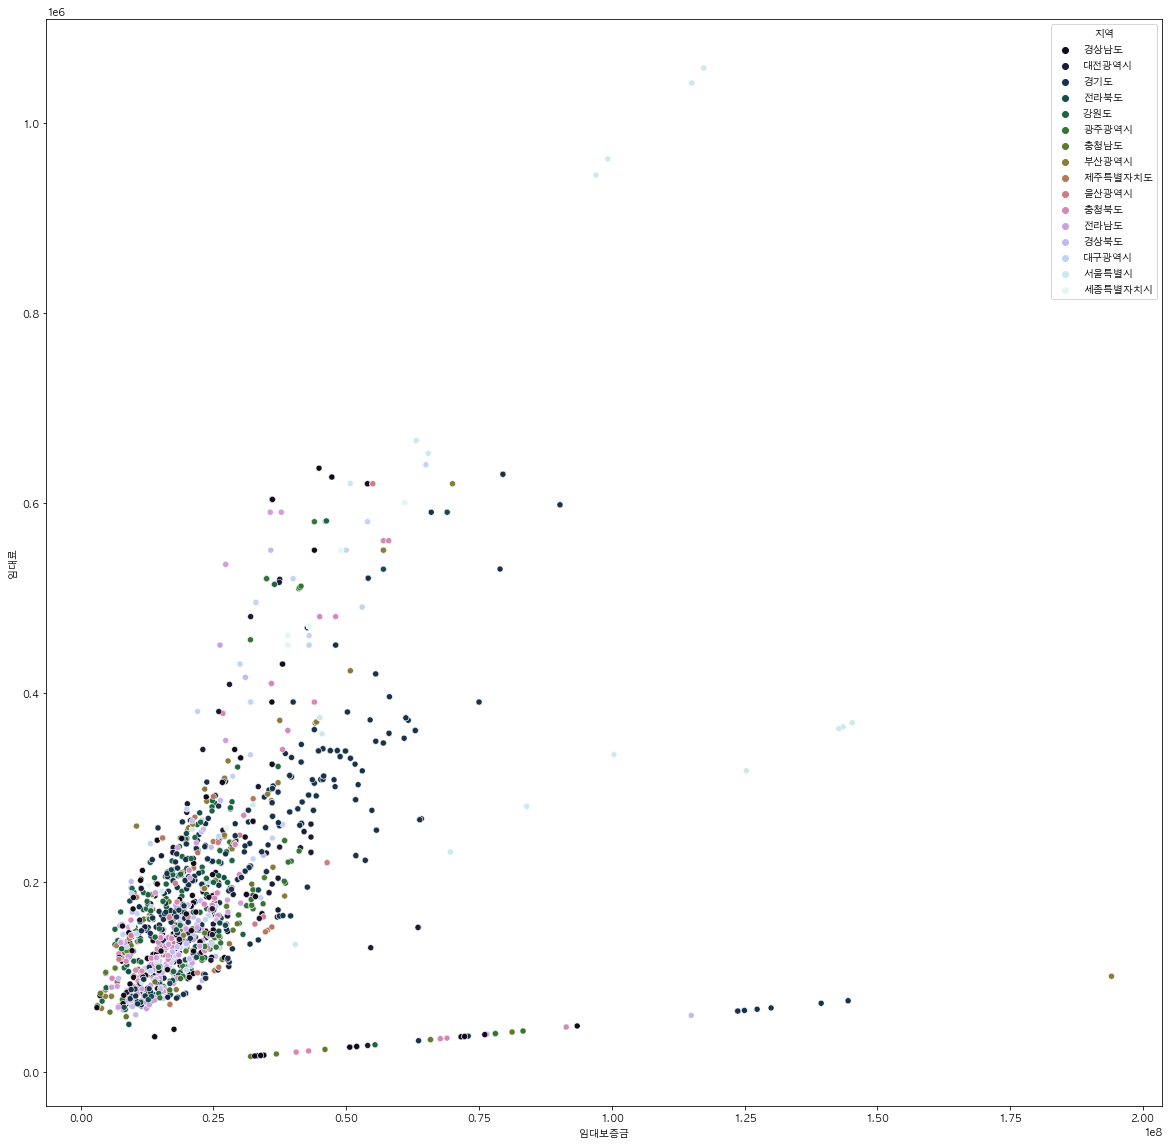

In [9]:
plot_scatter(new_train['임대보증금'], new_train['임대료'], new_train['지역'])

In [10]:
# 지하철 결측치 채우기

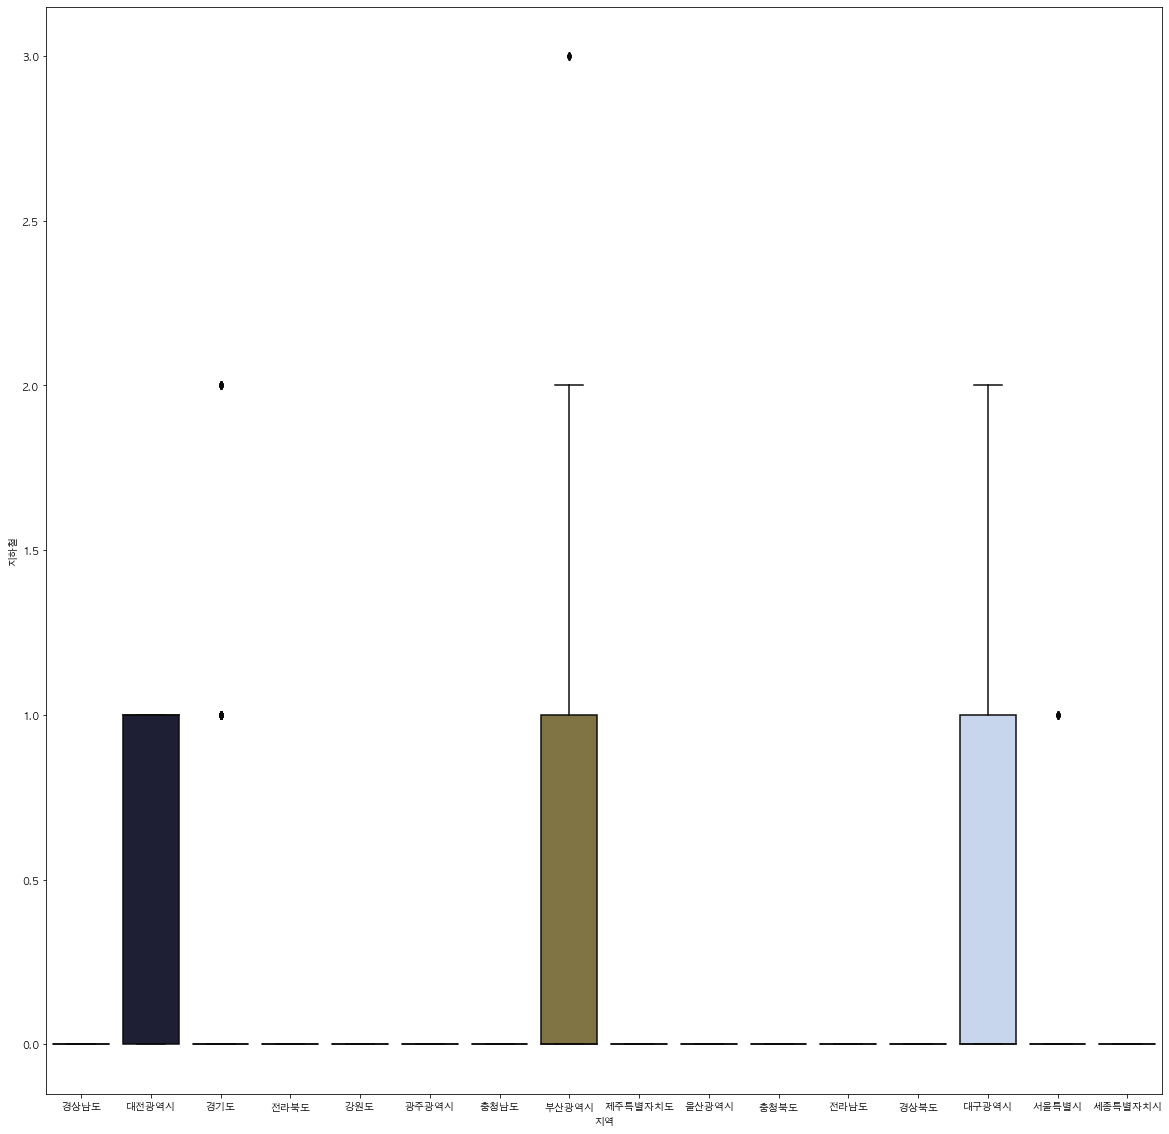

In [11]:
plot_box(new_train['지역'], new_train['지하철'])

In [12]:
new_train[new_train['지하철'].isna()==True]['지역'].unique()

array(['충청남도', '대전광역시'], dtype=object)

In [13]:
temp = new_train.copy()
region_list = ['충청남도', '대전광역시']

In [14]:
for idx, i  in enumerate(region_list):
    new_train.loc[(new_train['지역'] == i) & (new_train['지하철'].isna()==True), '지하철'] = temp[temp['지역'] == i]['지하철'].mean()

In [15]:
# 임대보증금, 임대료 결측치 처리
new_train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       581
임대료         584
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [16]:
# 임대보증금과 임대료 회귀분석으로 값 채우기

In [17]:
temp = new_train.copy()

In [18]:
# categorical feature labeling
local_map = {}
var_list = ['단지코드', '임대건물구분', '지역', '공급유형', '신분']
for idx, var in enumerate(var_list):
    for i, loc in enumerate(temp[var].unique()):
        local_map[loc] = i
        
    temp[var] = temp[var].map(local_map)

In [19]:
# 아파트의 임대보증금
apt_deposit_not_null = temp[(temp['임대건물구분'] == 0) & (temp['임대보증금'].isna() == False)]

In [20]:
apt_deposit_null = temp[(temp['임대건물구분'] == 0) & (temp['임대보증금'].isna() == True)]

In [21]:
X = apt_deposit_not_null.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], axis=1)
y = apt_deposit_not_null['임대보증금']

In [22]:
lr = LinearRegression()

In [23]:
def regression(model, X, y):
    model.fit(X, y)
    r2 = model.score(X, y)
    y_hat = model.predict(X)
    rmse = np.sqrt(((y_hat - y) ** 2).mean())
    print ("r2 socre :", r2, "RMSE :", rmse)

In [24]:
regression(lr, X, y)

r2 socre : 0.469571269027485 RMSE : 14240904.729933232


In [25]:
X_re = apt_deposit_null.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], 1)

In [27]:
def fill_column(model, X, y, X_re, column):
    model.fit(X, y)
    predict = model.predict(X_re)
    data = X_re.copy()
    data[column] = predict
    temp[column].loc[data.index] = data[column]

In [28]:
fill_column(lr, X, y, X_re, column = '임대보증금')

In [31]:
# 아파트의 임대료

In [32]:
apt_rent_not_null = temp[(temp['임대건물구분'] == 0) & (temp['임대료'].isna() == False)]
apt_rent_null = temp[(temp['임대건물구분'] == 0) & (temp['임대료'].isna() == True)]

In [33]:
X = apt_rent_not_null.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], axis=1)
y = apt_rent_not_null['임대료']

In [34]:
regression(lr, X, y)

r2 socre : 0.6908740814964134 RMSE : 69763.20055042396


In [35]:
X_re = apt_rent_null.drop(['임대건물구분','임대보증금','임대료', '등록차량수'], 1)

In [36]:
fill_column(lr, X, y, X_re, column = '임대료')

In [37]:
temp

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
8,0,545,0,0,0,30.0,276,17.0,0,9216000.0,82940.0,0.0,3.0,624.0,205.0
9,0,545,0,0,0,35.0,60,17.0,0,12672000.0,107130.0,0.0,3.0,624.0,205.0
10,0,545,0,0,0,35.0,20,17.0,0,12672000.0,107130.0,0.0,3.0,624.0,205.0
11,0,545,0,0,0,45.0,38,17.0,0,18433000.0,149760.0,0.0,3.0,624.0,205.0
12,0,545,0,0,0,45.0,19,17.0,0,18433000.0,149760.0,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,410,239,0,4,0,45.0,19,7.0,0,11346000.0,116090.0,0.0,1.0,166.0,146.0
2948,410,239,0,4,0,50.0,34,7.0,0,14005000.0,142310.0,0.0,1.0,166.0,146.0
2949,410,239,0,4,0,50.0,34,7.0,0,14005000.0,142310.0,0.0,1.0,166.0,146.0
2950,410,239,0,4,0,50.0,114,7.0,0,14005000.0,142310.0,0.0,1.0,166.0,146.0
